In [190]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import special
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from sklearn.manifold import TSNE 
from sklearn import manifold
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100leaves-txt/data_Mar_64.txt
/kaggle/input/100leaves-txt/data_Tex_64.txt
/kaggle/input/100leaves-txt/data_Sha_64.txt
/kaggle/input/100leaves/data_Tex_64.csv
/kaggle/input/100leaves/data_Sha_64.csv
/kaggle/input/100leaves/data_Mar_64.csv


#### clean data

In [191]:
view_Tex=pd.read_table("../input/100leaves-txt/data_Tex_64.txt",header=None,sep=",")
view_Tex
view_Sha=pd.read_csv("../input/100leaves-txt/data_Sha_64.txt",header=None,sep=",")
view_Sha
view_Mar=pd.read_csv("../input/100leaves-txt/data_Mar_64.txt",header=None,sep=",")
view_Mar

s_Tex=view_Tex.iloc[15:303,:]

lable_in_tex=s_Tex.iloc[:,0].unique()
#for i in  lable_in_tex:
  #  print(i)

s_Mar=view_Mar[view_Mar.iloc[:,0].isin(lable_in_tex)]
s_Tex

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
15,Acer Capillipes,0.000977,0.030273,0.009766,0.000000,0.103520,0.004883,0.000000,0.080078,0.039062,...,0.094727,0.0,0.016602,0.000000,0.018555,0.000000,0.0,0.000977,0.028320,0.000000
16,Acer Capillipes,0.004883,0.061523,0.021484,0.000977,0.045898,0.005859,0.006836,0.070312,0.064453,...,0.032227,0.0,0.002930,0.000000,0.018555,0.000000,0.0,0.000000,0.036133,0.020508
17,Acer Capillipes,0.000000,0.048828,0.020508,0.000000,0.083008,0.004883,0.000977,0.080078,0.050781,...,0.022461,0.0,0.002930,0.000000,0.018555,0.000000,0.0,0.000000,0.022461,0.000000
18,Acer Capillipes,0.000000,0.060547,0.031250,0.000000,0.104490,0.015625,0.000000,0.097656,0.035156,...,0.106450,0.0,0.011719,0.000000,0.006836,0.000000,0.0,0.000000,0.016602,0.000977
19,Acer Capillipes,0.000000,0.058594,0.017578,0.000000,0.099609,0.015625,0.000000,0.097656,0.031250,...,0.096680,0.0,0.008789,0.000000,0.011719,0.000000,0.0,0.000000,0.021484,0.000977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,Betula Pendula,0.006836,0.000977,0.000000,0.120120,0.000000,0.007812,0.001953,0.000000,0.022461,...,0.000000,0.0,0.000000,0.006836,0.023438,0.000000,0.0,0.000000,0.000000,0.022461
299,Betula Pendula,0.000000,0.000000,0.000000,0.032227,0.000000,0.000977,0.000000,0.000000,0.006836,...,0.000000,0.0,0.000000,0.030273,0.002930,0.018555,0.0,0.048828,0.000000,0.000000
300,Betula Pendula,0.000000,0.000977,0.000000,0.079102,0.000000,0.004883,0.000000,0.000000,0.012695,...,0.000000,0.0,0.000000,0.050781,0.005859,0.000977,0.0,0.025391,0.009766,0.000000
301,Betula Pendula,0.000000,0.000000,0.000000,0.036133,0.000000,0.006836,0.000977,0.000000,0.005859,...,0.000000,0.0,0.000000,0.047852,0.017578,0.006836,0.0,0.050781,0.020508,0.003906


In [192]:
s_Sha=pd.DataFrame()
for i in lable_in_tex:
    
    s_Sha1=view_Sha[view_Sha.iloc[:,0].isin([i])]
    s_Sha=pd.concat([s_Sha,s_Sha1],axis=0,ignore_index=True)
s_Sha.describe()

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.000606,0.000589,0.000569,0.000552,0.000538,0.000530,0.000527,0.000521,0.000513,0.000503,...,0.000472,0.000469,0.000463,0.000463,0.000473,0.000487,0.000505,0.000533,0.000566,0.000597
std,0.000244,0.000247,0.000243,0.000241,0.000239,0.000231,0.000222,0.000216,0.000215,0.000217,...,0.000189,0.000191,0.000189,0.000194,0.000205,0.000217,0.000224,0.000224,0.000225,0.000234
min,0.000226,0.000196,0.000186,0.000149,0.000183,0.000147,0.000111,0.000110,0.000136,0.000113,...,0.000150,0.000147,0.000125,0.000079,0.000091,0.000112,0.000139,0.000159,0.000216,0.000210
25%,0.000448,0.000435,0.000411,0.000396,0.000382,0.000373,0.000387,0.000385,0.000365,0.000349,...,0.000330,0.000339,0.000346,0.000331,0.000321,0.000317,0.000342,0.000375,0.000414,0.000442
50%,0.000544,0.000524,0.000504,0.000485,0.000480,0.000480,0.000471,0.000475,0.000465,0.000442,...,0.000435,0.000449,0.000454,0.000451,0.000443,0.000454,0.000456,0.000476,0.000506,0.000534
75%,0.000674,0.000660,0.000644,0.000634,0.000624,0.000604,0.000580,0.000590,0.000602,0.000601,...,0.000563,0.000558,0.000547,0.000554,0.000578,0.000607,0.000632,0.000632,0.000651,0.000669
max,0.001460,0.001436,0.001360,0.001315,0.001298,0.001287,0.001314,0.001290,0.001277,0.001378,...,0.001345,0.001333,0.001200,0.001139,0.001180,0.001181,0.001178,0.001284,0.001383,0.001472


In [193]:

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)





In [194]:
s_Tex.shape
y_Tex=s_Tex.iloc[:,0]
y_Tex=y_Tex.values
x_Tex=s_Tex.iloc[:,1:66].values
for i in range (0,len(y_Tex)):

    if y_Tex[i]== 'Acer Capillipes':
        y_Tex[i]=1
    elif y_Tex[i]== 'Acer Circinatum':
        y_Tex[i]=2
    elif y_Tex[i]== 'Acer Mono':
        y_Tex[i]=3
    elif y_Tex[i]== 'Acer Opalus':
        y_Tex[i]=4
    elif y_Tex[i]== 'Acer Palmatum':
        y_Tex[i]=5
    elif y_Tex[i]== 'Acer Pictum':
        y_Tex[i]=6
    elif y_Tex[i]=='Acer Platanoids':
        y_Tex[i]=7
    elif y_Tex[i]== 'Acer Rubrum':
        y_Tex[i]=8
    elif y_Tex[i]== 'Acer Rufinerve':
        y_Tex[i]=9 
    elif y_Tex[i]== 'Acer Saccharinum':
        y_Tex[i]=10  
    elif y_Tex[i]== 'Alnus Cordata':
        y_Tex[i]=11  
    elif y_Tex[i]==  'Alnus Maximowiczii':
        y_Tex[i]=12 
    elif y_Tex[i]==  'Alnus Rubra':
        y_Tex[i]=13
    elif y_Tex[i]==  'Alnus Sieboldiana':
        y_Tex[i]=14
    
    elif y_Tex[i]== 'Alnus Viridis':
        y_Tex[i]=15
    elif y_Tex[i]=='Arundinaria Simonii':
        y_Tex[i]=16
    elif y_Tex[i]=='Betula Austrosinensis':
        y_Tex[i]=17
    else:
        y_Tex[i]=18
print(y_Tex)

print(x_Tex)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 15 16 16
 16 16 16 16 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18]
[[0.000977 0.030273 0.009766 ... 0.000977 0.02832  0.      ]
 [0.004883 0.061523 0.021484 ... 0.       0.036133 0.020508]
 [0.       0.048828 0.020508 ... 0.       0.022461 0.      ]
 ...
 [0.       0.000977 0.       ... 0.025391 0.009766 0.      ]
 [0.       0.       

### T-sne to show data

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


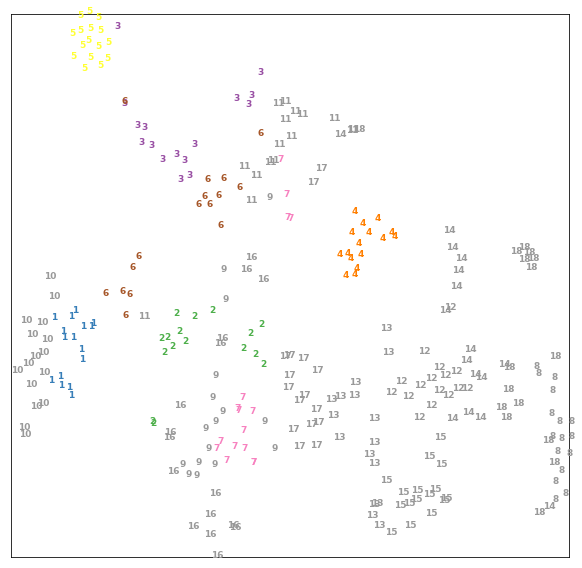

In [195]:
from sklearn.manifold import TSNE 
from sklearn import manifold
import matplotlib.pyplot as plt
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,learning_rate='auto')
X_tsne_Tex = tsne.fit_transform(x_Tex)
x_min, x_max = X_tsne_Tex.min(0), X_tsne_Tex.max(0)

X_norm= (X_tsne_Tex - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(10, 10))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y_Tex[i]), color=plt.cm.Set1(y_Tex[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()


In [196]:
y_Sha=s_Sha.iloc[:,0]
y_Sha=y_Sha.values
x_Sha=s_Sha.iloc[:,1:66].values

for i in range (0,len(y_Sha)):

    if y_Sha[i]== 'Acer Capillipes':
        y_Sha[i]=1
    elif y_Sha[i]== 'Acer Circinatum':
        y_Sha[i]=2
    elif y_Sha[i]== 'Acer Mono':
        y_Sha[i]=3
    elif y_Sha[i]== 'Acer Opalus':
        y_Sha[i]=4
    elif y_Sha[i]== 'Acer Palmatum':
        y_Sha[i]=5
    elif y_Sha[i]== 'Acer Pictum':
        y_Sha[i]=6
    elif y_Sha[i]=='Acer Platanoids':
        y_Sha[i]=7
    elif y_Sha[i]== 'Acer Rubrum':
        y_Sha[i]=8
    elif y_Sha[i]== 'Acer Rufinerve':
        y_Sha[i]=9 
    elif y_Sha[i]== 'Acer Saccharinum':
        y_Sha[i]=10  
    elif y_Sha[i]== 'Alnus Cordata':
        y_Sha[i]=11  
    elif y_Sha[i]==  'Alnus Maximowiczii':
        y_Sha[i]=12 
    elif y_Sha[i]==  'Alnus Rubra':
        y_Sha[i]=13
    elif y_Sha[i]==  'Alnus Sieboldiana':
        y_Sha[i]=14
    
    elif y_Sha[i]== 'Alnus Viridis':
        y_Sha[i]=15
    elif y_Sha[i]=='Arundinaria Simonii':
        y_Sha[i]=16
    elif y_Sha[i]=='Betula Austrosinensis':
        y_Sha[i]=17
    else:
        y_Sha[i]=18


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


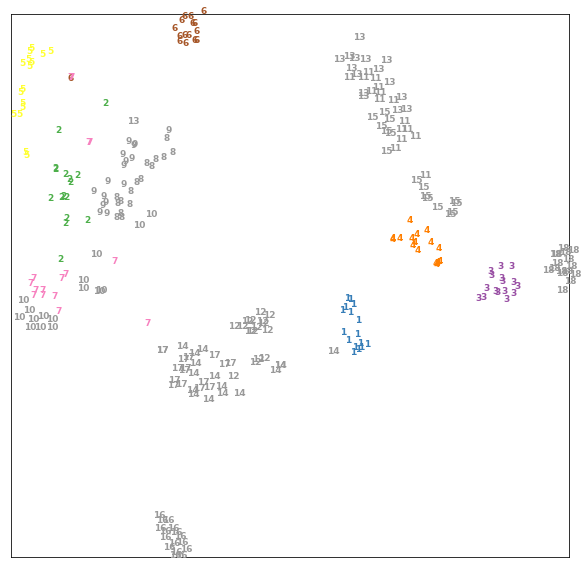

In [197]:
X_tsne_Sha = tsne.fit_transform(x_Sha)
x_min, x_max = X_tsne_Sha.min(0), X_tsne_Sha.max(0)

X_norm= (X_tsne_Sha - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(10,10))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y_Sha[i]), color=plt.cm.Set1(y_Sha[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [198]:
y_Mar=s_Mar.iloc[:,0]
y_Mar=y_Mar.values
x_Mar=s_Mar.iloc[:,1:66].values
for i in range (0,len(y_Mar)):

    if y_Mar[i]== 'Acer Capillipes':
        y_Mar[i]=1
    elif y_Mar[i]== 'Acer Circinatum':
        y_Mar[i]=2
    elif y_Mar[i]== 'Acer Mono':
        y_Mar[i]=3
    elif y_Mar[i]== 'Acer Opalus':
        y_Mar[i]=4
    elif y_Mar[i]== 'Acer Palmatum':
        y_Mar[i]=5
    elif y_Mar[i]== 'Acer Pictum':
        y_Mar[i]=6
    elif y_Mar[i]=='Acer Platanoids':
        y_Mar[i]=7
    elif y_Mar[i]== 'Acer Rubrum':
        y_Mar[i]=8
    elif y_Mar[i]== 'Acer Rufinerve':
        y_Mar[i]=9 
    elif y_Mar[i]== 'Acer Saccharinum':
        y_Mar[i]=10  
    elif y_Mar[i]== 'Alnus Cordata':
        y_Mar[i]=11  
    elif y_Mar[i]==  'Alnus Maximowiczii':
        y_Mar[i]=12 
    elif y_Mar[i]==  'Alnus Rubra':
        y_Mar[i]=13
    elif y_Mar[i]==  'Alnus Sieboldiana':
        y_Mar[i]=14
    
    elif y_Mar[i]== 'Alnus Viridis':
        y_Mar[i]=15
    elif y_Mar[i]=='Arundinaria Simonii':
        y_Mar[i]=16
    elif y_Mar[i]=='Betula Austrosinensis':
        y_Mar[i]=17
    else:
        y_Mar[i]=18
y_Mar


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 17, 17, 17, 17, 17, 17

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


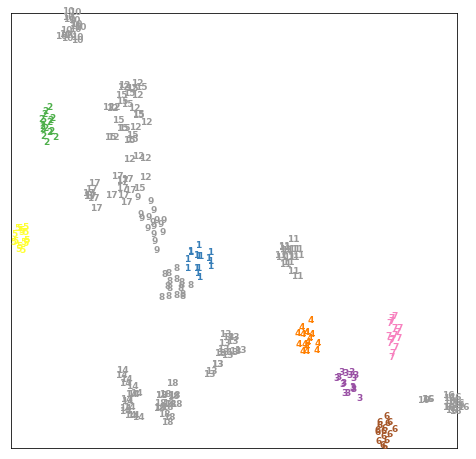

In [199]:
X_tsne_Mar = tsne.fit_transform(x_Mar)
x_min, x_max = X_tsne_Mar.min(0), X_tsne_Mar.max(0)

X_norm= (X_tsne_Mar - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y_Mar[i]), color=plt.cm.Set1(y_Mar[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [200]:

x_Tex= np.column_stack((x_Tex,range(0,288)))
x_Mar= np.column_stack((x_Mar,range(0,288)))
x_Sha= np.column_stack((x_Sha,range(0,288)))


#x_Sha= np.column_stack((x_Sha,range(1,289)))
#x_Mar= np.column_stack((x_Mar,range(1,289)))

In [201]:
print(x_Tex.shape)
print(x_Sha.shape)
print(x_Mar.shape)

(288, 65)
(288, 65)
(288, 65)


In [202]:
print(y_Tex.shape)
print(y_Mar.shape)
print(y_Sha.shape)
print(y_Mar[31])
print(y_Tex[31])

(288,)
(288,)
(288,)
2
2


In [203]:

seed = 7
test_size = 0.33
print(x_Tex.shape)
X_train_Tex, X_validate_Tex, y_train_Tex, y_validate_Tex = train_test_split(x_Tex, y_Tex, test_size=test_size,
    random_state=seed)

print(X_train_Tex.shape)
print(y_train_Tex)
X_train_Tex[:,64]

(288, 65)
(192, 65)
[4 16 4 9 17 12 14 14 15 18 16 6 8 2 1 9 17 1 14 1 2 7 4 17 6 3 7 18 10 9
 1 6 15 3 12 3 5 13 9 4 6 13 12 3 10 7 17 17 8 4 4 13 6 8 17 18 12 17 12 6
 7 13 4 12 1 2 13 8 13 7 11 9 13 5 2 12 11 15 16 17 15 8 11 17 9 2 5 9 10
 9 3 14 12 4 3 15 4 16 4 9 4 2 8 9 7 18 5 17 7 16 1 2 3 12 13 15 8 2 10 12
 6 9 16 8 14 14 5 18 2 16 3 15 1 10 2 15 14 8 18 15 11 7 10 15 18 10 9 4
 17 3 15 1 18 5 6 11 6 10 8 10 13 17 18 13 9 17 3 13 12 16 8 12 10 12 3 1
 16 5 1 5 11 14 3 5 2 12 7 14 5 2 13 11]


array([ 52., 247.,  58., 132., 265., 180., 216., 212., 226., 285., 244.,
        80., 126.,  31.,   1., 138., 259.,  13., 222.,   9.,  18., 102.,
        55., 266.,  95.,  34.,  96., 278., 156., 129.,  14.,  91., 236.,
        45., 177.,  32.,  77., 193., 133.,  63.,  82., 194., 188.,  41.,
       148., 109., 268., 267., 121.,  51.,  56., 204.,  85., 120., 271.,
       273., 184., 269., 176.,  87., 105., 202.,  49., 182.,   5.,  17.,
       205., 116., 200., 106., 162., 134., 206.,  64.,  26., 181., 169.,
       237., 242., 270., 238., 117., 166., 264., 136.,  29.,  79., 140.,
       157., 131.,  39., 215., 190.,  54.,  43., 228.,  48., 245.,  59.,
       143.,  53.,  20., 124., 142., 110., 283.,  76., 261., 107., 252.,
        12.,  16.,  47., 186., 203., 234., 119.,  21., 146., 178.,  83.,
       130., 253., 127., 209., 221.,  73., 281.,  30., 246.,  33., 230.,
         4., 155.,  19., 235., 219., 123., 284., 225., 163., 100., 149.,
       224., 272., 151., 135.,  61., 256.,  35., 23

### split

In [204]:
x_index_Tex=X_train_Tex[:,64]

x_index_Tex=list(map(int,x_index_Tex))


In [205]:
X_train_Mar=[]
np.array(X_train_Mar )
y_train_Mar=[]
np.array(y_train_Mar )

array([], dtype=float64)

In [206]:
for i in x_index_Tex:
    Mar_arr1x=x_Mar[i].tolist()
    X_train_Mar.append(Mar_arr1x)
    Mar_arr1y=y_Mar[i]
   
    y_train_Mar.append(Mar_arr1y)
X_train_Mar=np.array(X_train_Mar)
y_train_Mar=np.array(y_train_Mar)

In [207]:
X_train_Sha=[]
np.array(X_train_Sha )
y_train_Sha=[]
np.array(y_train_Sha )

array([], dtype=float64)

In [208]:
for i in x_index_Tex:
    Sha_arr1x=x_Sha[i].tolist()
    X_train_Sha.append(Sha_arr1x)
    Sha_arr1y=y_Sha[i]
   
    y_train_Sha.append(Sha_arr1y)
X_train_Sha=np.array(X_train_Sha)
y_train_Sha=np.array(y_train_Sha)


In [209]:
X_train_Sha
y_train_Sha

array([ 4, 16,  4,  9, 17, 12, 14, 14, 15, 18, 16,  6,  8,  2,  1,  9, 17,
        1, 14,  1,  2,  7,  4, 17,  6,  3,  7, 18, 10,  9,  1,  6, 15,  3,
       12,  3,  5, 13,  9,  4,  6, 13, 12,  3, 10,  7, 17, 17,  8,  4,  4,
       13,  6,  8, 17, 18, 12, 17, 12,  6,  7, 13,  4, 12,  1,  2, 13,  8,
       13,  7, 11,  9, 13,  5,  2, 12, 11, 15, 16, 17, 15,  8, 11, 17,  9,
        2,  5,  9, 10,  9,  3, 14, 12,  4,  3, 15,  4, 16,  4,  9,  4,  2,
        8,  9,  7, 18,  5, 17,  7, 16,  1,  2,  3, 12, 13, 15,  8,  2, 10,
       12,  6,  9, 16,  8, 14, 14,  5, 18,  2, 16,  3, 15,  1, 10,  2, 15,
       14,  8, 18, 15, 11,  7, 10, 15, 18, 10,  9,  4, 17,  3, 15,  1, 18,
        5,  6, 11,  6, 10,  8, 10, 13, 17, 18, 13,  9, 17,  3, 13, 12, 16,
        8, 12, 10, 12,  3,  1, 16,  5,  1,  5, 11, 14,  3,  5,  2, 12,  7,
       14,  5,  2, 13, 11])

In [210]:
X_train_Tex
y_train_Tex

array([4, 16, 4, 9, 17, 12, 14, 14, 15, 18, 16, 6, 8, 2, 1, 9, 17, 1, 14,
       1, 2, 7, 4, 17, 6, 3, 7, 18, 10, 9, 1, 6, 15, 3, 12, 3, 5, 13, 9,
       4, 6, 13, 12, 3, 10, 7, 17, 17, 8, 4, 4, 13, 6, 8, 17, 18, 12, 17,
       12, 6, 7, 13, 4, 12, 1, 2, 13, 8, 13, 7, 11, 9, 13, 5, 2, 12, 11,
       15, 16, 17, 15, 8, 11, 17, 9, 2, 5, 9, 10, 9, 3, 14, 12, 4, 3, 15,
       4, 16, 4, 9, 4, 2, 8, 9, 7, 18, 5, 17, 7, 16, 1, 2, 3, 12, 13, 15,
       8, 2, 10, 12, 6, 9, 16, 8, 14, 14, 5, 18, 2, 16, 3, 15, 1, 10, 2,
       15, 14, 8, 18, 15, 11, 7, 10, 15, 18, 10, 9, 4, 17, 3, 15, 1, 18,
       5, 6, 11, 6, 10, 8, 10, 13, 17, 18, 13, 9, 17, 3, 13, 12, 16, 8,
       12, 10, 12, 3, 1, 16, 5, 1, 5, 11, 14, 3, 5, 2, 12, 7, 14, 5, 2,
       13, 11], dtype=object)

In [211]:
X_train_Mar
y_train_Mar

array([ 4, 16,  4,  9, 17, 12, 14, 14, 15, 18, 16,  6,  8,  2,  1,  9, 17,
        1, 14,  1,  2,  7,  4, 17,  6,  3,  7, 18, 10,  9,  1,  6, 15,  3,
       12,  3,  5, 13,  9,  4,  6, 13, 12,  3, 10,  7, 17, 17,  8,  4,  4,
       13,  6,  8, 17, 18, 12, 17, 12,  6,  7, 13,  4, 12,  1,  2, 13,  8,
       13,  7, 11,  9, 13,  5,  2, 12, 11, 15, 16, 17, 15,  8, 11, 17,  9,
        2,  5,  9, 10,  9,  3, 14, 12,  4,  3, 15,  4, 16,  4,  9,  4,  2,
        8,  9,  7, 18,  5, 17,  7, 16,  1,  2,  3, 12, 13, 15,  8,  2, 10,
       12,  6,  9, 16,  8, 14, 14,  5, 18,  2, 16,  3, 15,  1, 10,  2, 15,
       14,  8, 18, 15, 11,  7, 10, 15, 18, 10,  9,  4, 17,  3, 15,  1, 18,
        5,  6, 11,  6, 10,  8, 10, 13, 17, 18, 13,  9, 17,  3, 13, 12, 16,
        8, 12, 10, 12,  3,  1, 16,  5,  1,  5, 11, 14,  3,  5,  2, 12,  7,
       14,  5,  2, 13, 11])

In [212]:
TexcDdict ={'TexcD_level1':[],
            'TexcD_level2':[],
            'TexcD_level3':[],
            'TexcD_level4':[],
            'TexcD_level5':[],
            'TexcD_level5':[],
            'TexcD_level6':[]
           }


TexcAdict ={'TexcA_level1':[],
            'TexcA_level2':[],
            'TexcA_level3':[],
            'TexcA_level4':[],
            'TexcA_level5':[],
            'TexcA_level5':[],
            'TexcA_level6':[]
           }


In [213]:
Texname_Dlv=['TexcD_level2','TexcD_level3','TexcD_level4','TexcD_level5','TexcD_level6']
Texname_Alv=['TexcA_level2','TexcA_level3','TexcA_level4','TexcA_level5','TexcA_level6']


In [214]:


X_train_Texc=X_train_Tex[:,0:64]

X_train_Texc=X_train_Texc.flatten()

import pywt
no_sample=0#第几个sample
for start in range (0,12288,64):
    end=start+64
    
    cA1,cD1=pywt.dwt(X_train_Texc[start:end],'haar') #一级分解
    lastcA=cA1#保存一级分解作为初始分解值
    level1_cD1=cD1
    TexcAdict['TexcA_level1'].append(cA1)
    TexcDdict['TexcD_level1'].append(cD1)
    
    for step in range(0,5):
        lastcA,cD_level=pywt.dwt(lastcA,'haar')#cD_level每一级分解值
        TexcDdict[Texname_Dlv[step]].append(cD_level)
        TexcAdict[Texname_Alv[step]].append(lastcA)
        


In [215]:
# X_train_Texc[0:64]
# cA1,cD1=pywt.dwt(X_train_Texc[0:64],'haar')
# print("cA1",cA1.shape)
# print("==================================")
# cA2,cD2=pywt.dwt(cA1,'haar')
# print("cA2",cA2)
# print("==================================")
# cA3,cD3=pywt.dwt(cA2,'haar')
# print("cA3",cA3)
# print("==================================")
# cA4,cD4=pywt.dwt(cA3,'haar')
# print("cA4",cA4)
# print("==================================")
# cA5,cD5=pywt.dwt(cA4,'haar')
# print("cA5",cA5)
# print("==================================")
# cA6,cD6=pywt.dwt(cA5,'haar')
# print("cA6",cA6)
# print("==================================")
# print('wave 分解')
# print(pywt.idwt(cA6,cD6,'haar')[0])

# #重构
# cA5[0]对比发现小波重构存在误差


In [216]:
# KK=pywt.idwt(
#     TexcAdict['TexcA_level6'],TexcDdict['TexcD_level6'],'haar')
# KK
# lv6=np.asarray(TexcAdict['TexcA_level6'])
# lv6.shape
# lv3=np.asarray(TexcAdict['TexcA_level3'])
# lv3.shape

In [217]:
ShacDdict ={'ShacD_level1':[],
            'ShacD_level2':[],
            'ShacD_level3':[],
            'ShacD_level4':[],
            'ShacD_level5':[],
            'ShacD_level5':[],
            'ShacD_level6':[]
           }


ShacAdict ={'ShacA_level1':[],
            'ShacA_level2':[],
            'ShacA_level3':[],
            'ShacA_level4':[],
            'ShacA_level5':[],
            'ShacA_level5':[],
            'ShacA_level6':[]
           }

In [218]:
Shaname_Dlv=['ShacD_level2','ShacD_level3','ShacD_level4','ShacD_level5','ShacD_level6']
Shaname_Alv=['ShacA_level2','ShacA_level3','ShacA_level4','ShacA_level5','ShacA_level6']

In [219]:
X_train_Shac=X_train_Sha[:,0:64]

X_train_Shac=X_train_Shac.flatten()


no_sample=0#第几个sample
for start in range (0,12288,64):
    end=start+64
    
    cA1,cD1=pywt.dwt(X_train_Shac[start:end],'haar') #一级分解
    lastcA=cA1#保存一级分解作为初始分解值
    level1_cD1=cD1
    ShacAdict['ShacA_level1'].append(cA1)
    ShacDdict['ShacD_level1'].append(cD1)
    
    for step in range(0,5):
        lastcA,cD_level=pywt.dwt(lastcA,'haar')#cD_level每一级分解值
        
        ShacDdict[Shaname_Dlv[step]].append(cD_level)
        ShacAdict[Shaname_Alv[step]].append(lastcA)

In [220]:
MarcDdict ={'MarcD_level1':[],
            'MarcD_level2':[],
            'MarcD_level3':[],
            'MarcD_level4':[],
            'MarcD_level5':[],
            'MarcD_level5':[],
            'MarcD_level6':[]
           }


MarcAdict ={'MarcA_level1':[],
            'MarcA_level2':[],
            'MarcA_level3':[],
            'MarcA_level4':[],
            'MarcA_level5':[],
            'MarcA_level5':[],
            'MarcA_level6':[]
           }

In [221]:
Marname_Dlv=['MarcD_level2','MarcD_level3','MarcD_level4','MarcD_level5','MarcD_level6']
Marname_Alv=['MarcA_level2','MarcA_level3','MarcA_level4','MarcA_level5','MarcA_level6']

In [222]:
X_train_Marc=X_train_Mar[:,0:64]

X_train_Marc=X_train_Marc.flatten()

import pywt
no_sample=0#第几个sample
for start in range (0,12288,64):
    end=start+64
    
    cA1,cD1=pywt.dwt(X_train_Marc[start:end],'haar') #一级分解
    lastcA=cA1#保存一级分解作为初始分解值
    level1_cD1=cD1
    MarcAdict['MarcA_level1'].append(cA1)
    MarcDdict['MarcD_level1'].append(cD1)
    
    for step in range(0,5):
        lastcA,cD_level=pywt.dwt(lastcA,'haar')#cD_level每一级分解值
        MarcDdict[Marname_Dlv[step]].append(cD_level)
        MarcAdict[Marname_Alv[step]].append(lastcA)

In [223]:
# x=range(0,192)
# y=TexcAdict['TexcA_level6']
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')


In [224]:
# x=range(0,192)
# y=ShacAdict['ShacA_level6']
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')

In [225]:
# x=range(0,192)
# y=MarcAdict['MarcA_level6']
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')

In [226]:
# atweight=np.random.dirichlet(np.ones(3),size=1)

# print(atweight)

# ViewM=pd.DataFrame (MarcAdict['MarcA_level6'])
# print(ViewM.describe())
# # ViewS=pd.DataFrame (ShacAdict['ShacA_level6'])
# print(ViewS.describe())
# ViewT=pd.DataFrame (TexcAdict['TexcA_level6'])
# print(ViewT.describe())

In [227]:
ViewM=np.array(MarcAdict['MarcA_level6']).T
ViewS=np.array(ShacAdict['ShacA_level6']).T
ViewT=np.array(TexcAdict['TexcA_level6']).T
ViewT.shape

(1, 192)

In [228]:
#初始化Q,K,V 矩阵
np.random.seed(888)

Query=np.random.normal(0,1,[192,192])
Key=np.random.normal(0,1,[192,192])
Value=np.random.normal(0,1,[192,192])


In [229]:
Allview = np.vstack((ViewT, ViewS,ViewM))
Allview.shape

(3, 192)

In [230]:
#Key representation 
Keyrep=np.dot(Allview,Key)
#Query representation 
Queryrep=np.dot(Allview,Query)
#value representation 
Valuerep=Allview
print(Keyrep.shape)
print(Queryrep.shape)


(3, 192)
(3, 192)


In [231]:
#获取注意力相似度
Newview=[0,0,0]
Mergeview=0#初始化注意力分数加权后相加的value值
for i in range (0,Keyrep.shape[0]):
    dotproduct=np.dot(Keyrep[i,:],Queryrep.T)
    softdot=special.softmax(dotproduct)#Calculate softmax
    print(softdot)
    for g in range(0,len(softdot)):
        scovalue=softdot[g]*Valuerep[g,:]#Multiply scores with values
        
        Mergeview=scovalue+Mergeview
    Newview[i]=Mergeview
    
    Mergeview=0

[0. 1. 0.]
[0.21525885 0.56948265 0.2152585 ]
[0. 1. 0.]


In [232]:
# x=range(0,192)
# y=Newview[0]
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')


In [233]:
# x=range(0,192)
# y=Newview[1]
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')

In [234]:
# x=range(0,192)
# y=Newview[2]
# fig = plt.figure(1)

# plt.scatter(x, y, alpha=0.5, marker='o')

In [235]:
#循环小波重构 for Tex
NTexcA_lv=Newview[0].reshape(192,1)#NTexcA_lvattention 得来的底层等级
for i in sorted(TexcDdict,reverse=True):
    NTexcA_lv=pywt.idwt(NTexcA_lv,TexcDdict[i],'haar')
# NTexcA_lv
#循环小波重构 for Sha
NShacA_lv=Newview[1].reshape(192,1)#NTexcA_lvattention 得来的底层等级
for i in sorted(ShacDdict,reverse=True):
    NShacA_lv=pywt.idwt(NShacA_lv,ShacDdict[i],'haar')
# NShacA_lv
#循环小波重构 for Mar
NMarcA_lv=Newview[2].reshape(192,1)#NTexcA_lvattention 得来的底层等级
for i in sorted(MarcDdict,reverse=True):
    NMarcA_lv=pywt.idwt(NMarcA_lv,MarcDdict[i],'haar')
# NMarcA_lv
# gk2=pywt.idwt(gk,TexcDdict['TexcD_level6'],'haar')
# gk3=pywt.idwt(gk2,TexcDdict['TexcD_level5'],'haar')
# gk4=pywt.idwt(gk3,TexcDdict['TexcD_level4'],'haar')
# gk5=pywt.idwt(gk4,TexcDdict['TexcD_level3'],'haar')
# gk6=pywt.idwt(gk5,TexcDdict['TexcD_level2'],'haar')
# gk7=pywt.idwt(gk6,TexcDdict['TexcD_level1'],'haar')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


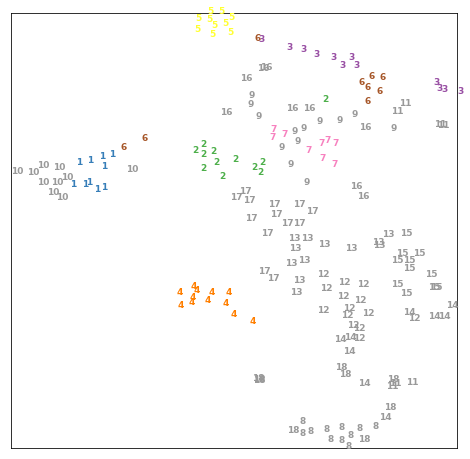

In [236]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=501,learning_rate='auto')
X_tsne_Tex = tsne.fit_transform(NTexcA_lv)
x_min, x_max = X_tsne_Tex.min(0), X_tsne_Tex.max(0)

X_norm= (X_tsne_Tex - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y_train_Tex[i]), color=plt.cm.Set1(y_train_Tex[i]), 
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()